In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Datos/auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

In [5]:
df.dropna(inplace=True)

Correlación

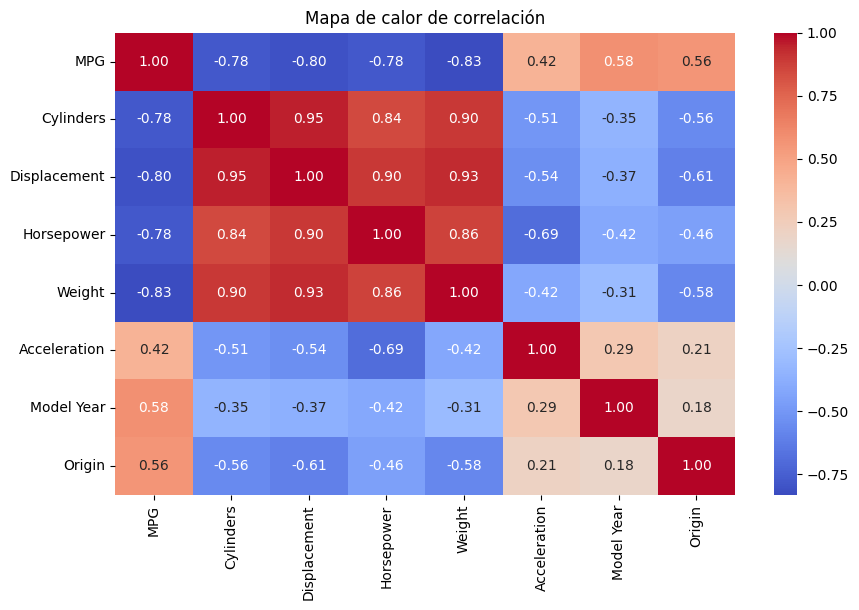

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('Datos/auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                        'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

# Convertir Horsepower a numérico (porque tiene valores '?')
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()


Variables escogidas 'Weight', 'Aceleration', 'Model Year', 'Origin'

In [9]:
df = df[['Weight', 'Acceleration', 'Model Year', 'Horsepower', 'MPG']]


Entrenar modelo

In [10]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,Weight,Acceleration,Model Year,Horsepower,MPG
326,2335.0,23.7,80,48.0,43.4
54,1613.0,18.0,71,69.0,35.0
78,2979.0,19.5,72,87.0,21.0
169,2914.0,16.0,75,100.0,20.0
368,2640.0,18.6,82,88.0,27.0


In [11]:
test = df.drop(train.index)
test.head()

,Weight,Acceleration,Model Year,Horsepower,MPG
0,3504.0,12.0,70,130.0,18.0
2,3436.0,11.0,70,150.0,18.0
4,3449.0,10.5,70,140.0,17.0
8,4425.0,10.0,70,225.0,14.0
13,3086.0,10.0,70,225.0,14.0


In [12]:
train_X = train.copy()
test_X = test.copy()

train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

train_X.head()
train_y.head()

326    43.4
54     35.0
78     21.0
169    20.0
368    27.0
Name: MPG, dtype: float64

Capa de Normalización

In [1]:
import tensorflow as tf

In [66]:

hpower = np.array(train_X)
norm = tf.keras.layers.Normalization(input_shape=[4], axis=-1) 
norm.adapt(hpower)  



Modelo 1 capa de normalización y 4 neuronas

In [79]:
model = tf.keras.Sequential([
    norm,  # Capa de normalización
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])


print(model.summary())

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_16                │ (None, 4)              │             9 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34 (140.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 9 (40.00 B)

None


In [83]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

print(train_X.shape[1])


4


In [84]:
%%time
history = model.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 23.8079 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.9813 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.6063 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.1438 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.5004 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.0915 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.8154 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.9207 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.8029 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.1651 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.0903 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.8

In [85]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [87]:
hist.head()

,loss,val_loss,epoch
0,23.766932,20.898445,0
1,22.966940,20.098450,1
2,22.166946,19.298458,2
3,21.366951,18.498463,3
4,20.566956,17.698467,4


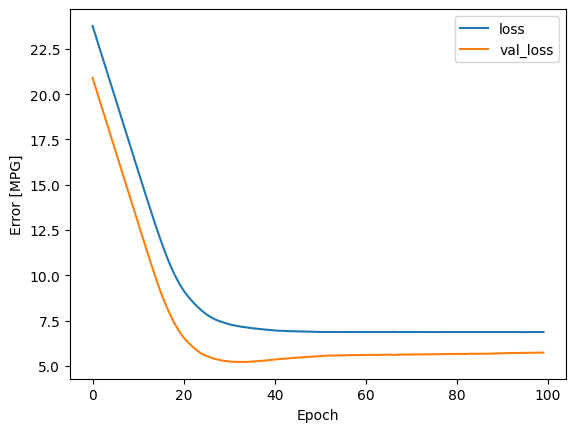

In [88]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

## Modificar número de neuronas

In [104]:
neuronas1 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

neuronas2 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(116, activation='relu'),
    tf.keras.layers.Dense(1)
])

neuronas3 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [105]:
neuronas1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

neuronas2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')         

neuronas3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [106]:
%%time
n1 = neuronas1.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)



Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 23.7926 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3684 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.5154 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.9131 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.0389 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.0802 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.4712 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.9618 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.9682 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.4828 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.0280 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.5

In [107]:
%%time
n2 = neuronas2.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 24.1595 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.3556 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.0729 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.4866 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.6936 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.9701 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.7588 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.8297 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.5389 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.6385 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.1437 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.0

In [108]:
%%time
n3 = neuronas3.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 23.9465 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.5238 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.2932 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.7421 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.9421 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.4801 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.2655 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1977 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3647 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.7247 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.4898 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.7

In [111]:
ne1 = pd.DataFrame(n1.history)
ne1['epoch'] = n1.epoch

ne2 = pd.DataFrame(n2.history)
ne2['epoch'] = n2.epoch

ne3 = pd.DataFrame(n3.history)
ne3['epoch'] = n3.epoch

ne1.head()

,loss,val_loss,epoch
0,23.766930,20.898445,0
1,22.966940,20.098450,1
2,22.166945,19.298458,2
3,21.366951,18.498463,3
4,20.566957,17.698467,4


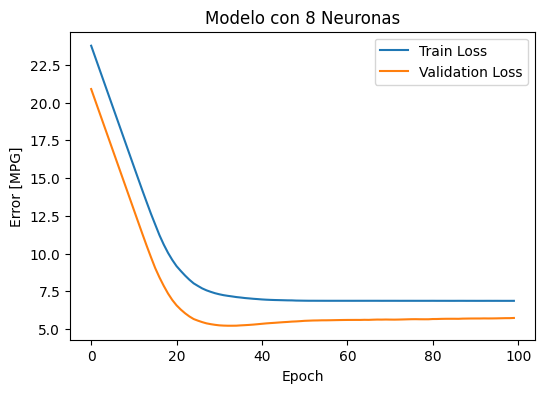

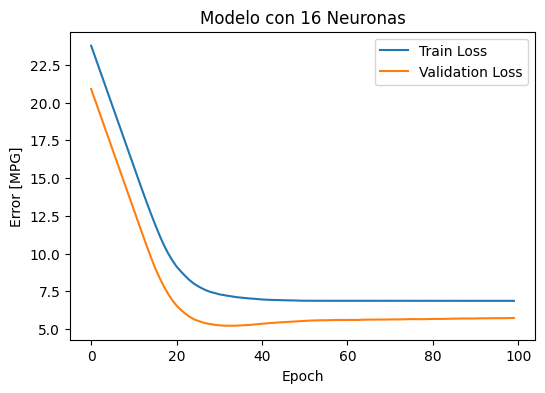

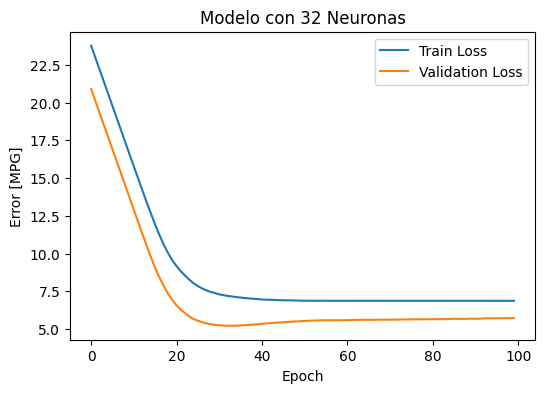

In [113]:
import matplotlib.pyplot as plt

# Gráfico para el modelo con 8 neuronas
plt.figure(figsize=(6, 4))
plt.plot(n1.history['loss'], label='Train Loss')
plt.plot(n1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 8 Neuronas')
plt.legend()
plt.show()

# Gráfico para el modelo con 16 neuronas
plt.figure(figsize=(6, 4))
plt.plot(n2.history['loss'], label='Train Loss')
plt.plot(n2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 16 Neuronas')
plt.legend()
plt.show()

# Gráfico para el modelo con 32 neuronas
plt.figure(figsize=(6, 4))
plt.plot(n3.history['loss'], label='Train Loss')
plt.plot(n3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 32 Neuronas')
plt.legend()
plt.show()


## Modificar Número de Capas

In [115]:
capa1 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

capa2 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

capa3 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  # 🔹 Agregamos una forma de entrada explícita
    var_norm,  # Capa de normalización
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [116]:
capa1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

capa2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')         

capa3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [117]:
%%time
c1 = capa1.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 24.0297 - val_loss: 21.6184
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.1372 - val_loss: 21.5384
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.8276 - val_loss: 21.4584
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.8191 - val_loss: 21.3784
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.8042 - val_loss: 21.2984
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.5817 - val_loss: 21.2184
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.2445 - val_loss: 21.1384
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.1942 - val_loss: 21.0584
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.2752 - val_loss: 20.9784
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.7631 - val_loss: 20.8984
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.4700 - val_loss: 20.8184
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.1

In [118]:
%%time
c2 = capa2.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 24.2384 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.9966 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.6496 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.1261 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.9671 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.7484 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.5431 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.7092 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.8413 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.8542 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.3728 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.3

In [119]:
%%time
c3 = capa3.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 23.8807 - val_loss: 20.8984
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3136 - val_loss: 20.0984
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4786 - val_loss: 19.2985
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.7536 - val_loss: 18.4985
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.4171 - val_loss: 17.6985
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.2581 - val_loss: 16.8985
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.0287 - val_loss: 16.0985
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.4632 - val_loss: 15.2985
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.9130 - val_loss: 14.4985
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.6114 - val_loss: 13.6985
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.4802 - val_loss: 12.8985
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.4

In [120]:
ca1 = pd.DataFrame(c1.history)
ca1['epoch'] = c1.epoch

ca2 = pd.DataFrame(c2.history)
ca2['epoch'] = c2.epoch

ca3 = pd.DataFrame(c3.history)
ca3['epoch'] = c3.epoch

ca1.head()

,loss,val_loss,epoch
0,24.079447,21.618439,0
1,23.999449,21.538441,1
2,23.919449,21.458441,2
3,23.839451,21.378441,3
4,23.759453,21.298439,4


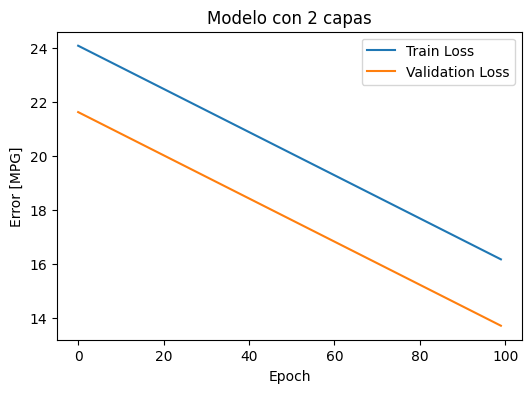

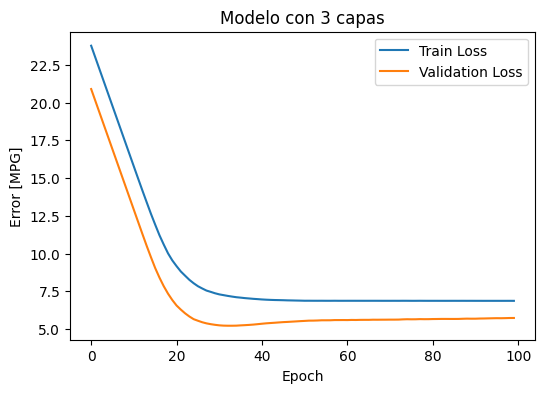

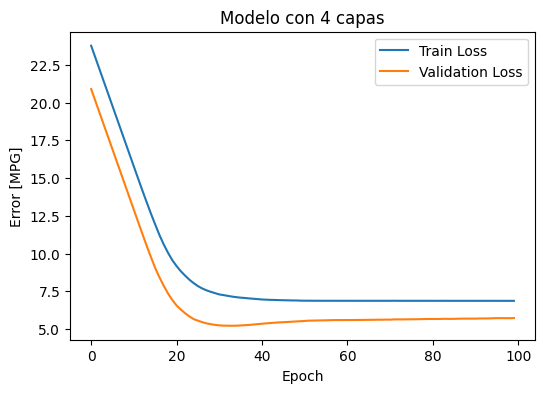

In [122]:
import matplotlib.pyplot as plt

# Gráfico para el modelo con 8 neuronas
plt.figure(figsize=(6, 4))
plt.plot(c1.history['loss'], label='Train Loss')
plt.plot(c1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 2 capas')
plt.legend()
plt.show()

# Gráfico para el modelo con 12 neuronas
plt.figure(figsize=(6, 4))
plt.plot(c2.history['loss'], label='Train Loss')
plt.plot(c2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 3 capas')
plt.legend()
plt.show()

# Gráfico para el modelo con 20 neuronas
plt.figure(figsize=(6, 4))
plt.plot(c3.history['loss'], label='Train Loss')
plt.plot(c3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con 4 capas')
plt.legend()
plt.show()

## Modificar Funciones de Activación

In [123]:

activacion1 = tf.keras.Sequential([
    var_norm,  
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1) 
])


activacion2 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  
    var_norm,
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])

activacion3 = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),  
    var_norm,
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(1)
])


In [124]:
activacion1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

activacion2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')         

activacion3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [125]:
%%time
a1 = activacion1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: nan - val_loss: nan
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss

In [126]:
%%time
a2 = activacion2.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: nan - val_loss: nan
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss

In [127]:
%%time
a3= activacion3.fit(
    train_X,  # Varias variables
    train_y,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: nan - val_loss: nan
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan - val_loss: nan
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss

In [128]:
ac1 = pd.DataFrame(a1.history)
ac1['epoch'] = a1.epoch

ac2 = pd.DataFrame(a2.history)
ac2['epoch'] = a2.epoch

ac3 = pd.DataFrame(a3.history)
ac3['epoch'] = a3.epoch

ac1.head()


,loss,val_loss,epoch
0,NaN,NaN,0
1,NaN,NaN,1
2,NaN,NaN,2
3,NaN,NaN,3
4,NaN,NaN,4


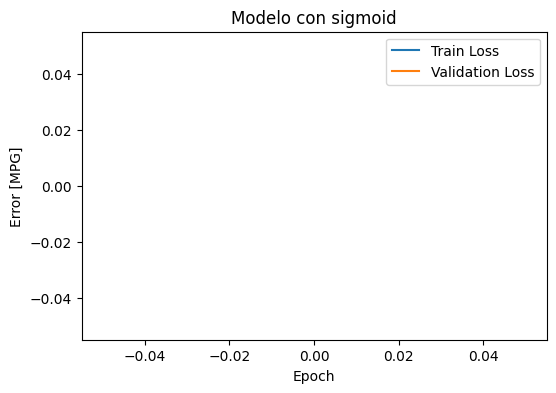

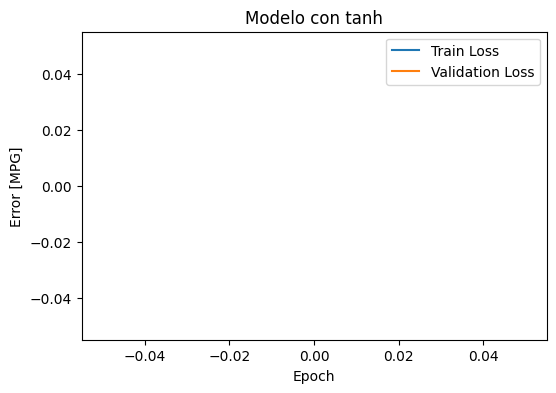

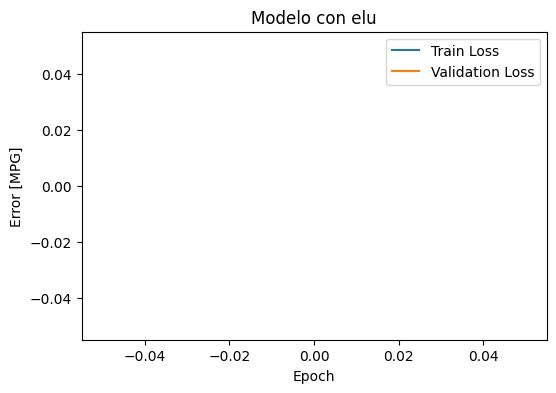

In [130]:
import matplotlib.pyplot as plt

# Gráfico para el modelo con 8 neuronas
plt.figure(figsize=(6, 4))
plt.plot(a1.history['loss'], label='Train Loss')
plt.plot(a1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con sigmoid')
plt.legend()
plt.show()

# Gráfico para el modelo con 12 neuronas
plt.figure(figsize=(6, 4))
plt.plot(a2.history['loss'], label='Train Loss')
plt.plot(a2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con tanh')
plt.legend()
plt.show()

# Gráfico para el modelo con 20 neuronas
plt.figure(figsize=(6, 4))
plt.plot(a3.history['loss'], label='Train Loss')
plt.plot(a3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title('Modelo con elu')
plt.legend()
plt.show()